# Understanding KNN with a Simple Car Example

Fundamental concepts of the K-Nearest Neighbors (KNN) algorithm using a small, illustrative dataset about cars. KNN is a supervised learning algorithm that can be used for both classification and regression tasks. It's based on the idea that similar data points are close to each other in a feature space.



In [150]:
import pandas as pd

# Create a larger dataset
data = {'mileage': [20000, 30000, 15000, 40000, 25000, 50000, 18000, 32000, 12000, 45000, 28000, 55000,
                    22000, 31000, 16000, 38000, 27000, 48000, 23000, 29000],
        'age': [2, 3, 1, 4, 2, 5, 1.8, 3.2, 1.2, 4.5, 2.8, 5.5,
                2.2, 3.1, 1.6, 3.8, 2.7, 4.8, 2.3, 2.9],
        'car_type': ['sedan', 'sedan', 'sedan', 'SUV', 'SUV', 'SUV',
                     'sedan', 'sedan', 'sedan', 'SUV', 'SUV', 'SUV',
                     'sedan', 'sedan', 'sedan', 'SUV', 'SUV', 'SUV', 'sedan', 'SUV']}
df = pd.DataFrame(data)
print(type(data))
print("Our larger car dataset:")
print(df)

<class 'dict'>
Our larger car dataset:
    mileage  age car_type
0     20000  2.0    sedan
1     30000  3.0    sedan
2     15000  1.0    sedan
3     40000  4.0      SUV
4     25000  2.0      SUV
5     50000  5.0      SUV
6     18000  1.8    sedan
7     32000  3.2    sedan
8     12000  1.2    sedan
9     45000  4.5      SUV
10    28000  2.8      SUV
11    55000  5.5      SUV
12    22000  2.2    sedan
13    31000  3.1    sedan
14    16000  1.6    sedan
15    38000  3.8      SUV
16    27000  2.7      SUV
17    48000  4.8      SUV
18    23000  2.3    sedan
19    29000  2.9      SUV


**Example 2: Visualizing the Data**

Visualizing the data helps us understand the relationship between the features and the car type. We'll use a scatter plot to show how the data points are distributed.

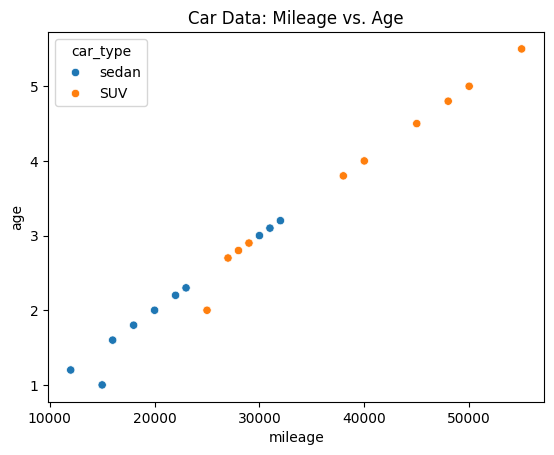

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='mileage', y='age', hue='car_type', data=df)
plt.title('Car Data: Mileage vs. Age')
plt.show()

**Example 3: Introducing a New Data Point**

Now, let's introduce a new, unknown car data point that we want to classify using KNN.

In [152]:
new_car = {'mileage': [35000], 'age': [3.5]}
new_car_df = pd.DataFrame(new_car)

print("\nNew car data point:")
print(new_car_df)


New car data point:
   mileage  age
0    35000  3.5


**Example 4: Calculating Distances**

KNN works by calculating the distance between the new data point and all existing data points. We'll use Euclidean distance as an example.

In [153]:
from sklearn.metrics.pairwise import euclidean_distances

# Separate features from target
X = df[['mileage', 'age']]
y = df['car_type']

# Calculate distances from the new car to all existing cars
distances = euclidean_distances(new_car_df, X)

print("\nDistances from new car to existing cars:")
print(distances)


Distances from new car to existing cars:
[[15000.000075    5000.000025   20000.00015625  5000.000025
  10000.0001125  15000.000075   17000.000085    3000.000015
  23000.000115   10000.00005     7000.000035   20000.0001
  13000.000065    4000.00002    19000.000095    3000.000015
   8000.00004    13000.000065   12000.00006     6000.00003   ]]


**Example 5: Finding the K-Nearest Neighbors and Making a Prediction**

Finally, we select the K nearest neighbors (let's say K=5) and determine the majority class among them to predict the type of the new car.


The 5 nearest neighbors car types are: ['sedan', 'SUV', 'sedan', 'sedan', 'SUV']
The predicted car type for the new car is: sedan


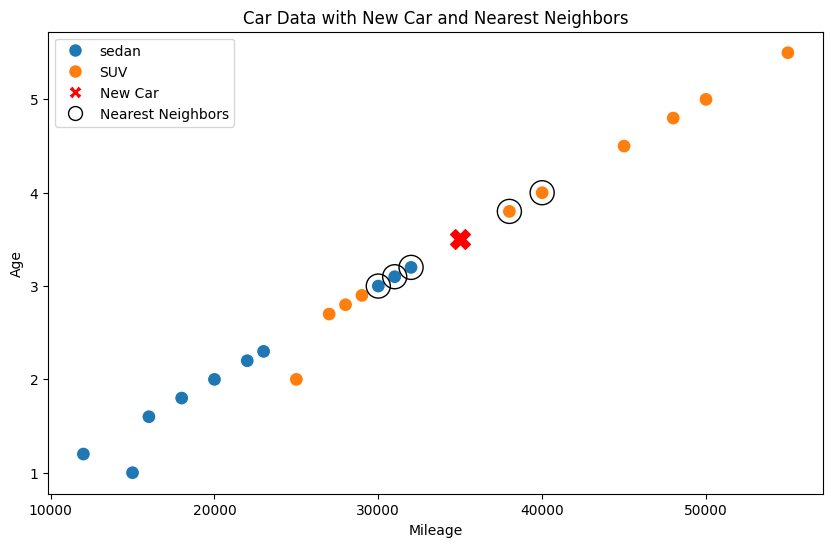

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Get the indices of the k nearest neighbors (K=3)
k = 5
nearest_neighbors_indices = np.argsort(distances[0])[:k]

# Get the car types of the nearest neighbors
nearest_neighbors_types = y.iloc[nearest_neighbors_indices].tolist()

print(f"\nThe {k} nearest neighbors car types are: {nearest_neighbors_types}")

# Predict the car type based on the majority class
from collections import Counter
prediction = Counter(nearest_neighbors_types).most_common(1)[0][0]

print(f"The predicted car type for the new car is: {prediction}")

# Add the new car and nearest neighbors to the plot
plt.figure(figsize=(10, 6))
# Plot existing cars
sns.scatterplot(x='mileage', y='age', hue='car_type', data=df, s=100) # Removed label='Existing Cars'

# Plot the new car
plt.scatter(new_car_df['mileage'], new_car_df['age'], color='red', s=200, marker='X', label='New Car')

# Highlight the nearest neighbors
nearest_neighbors_df = df.iloc[nearest_neighbors_indices]
plt.scatter(nearest_neighbors_df['mileage'], nearest_neighbors_df['age'], facecolors='none', edgecolors='black', s=300, label='Nearest Neighbors')

plt.title('Car Data with New Car and Nearest Neighbors')
plt.xlabel('Mileage')
plt.ylabel('Age')

# Create custom legend handles
legend_handles = []
for car_type, color in zip(df['car_type'].unique(), sns.color_palette(n_colors=len(df['car_type'].unique()))):
    legend_handles.append(Line2D([0], [0], marker='o', color='w', label=car_type,
                                 markerfacecolor=color, markersize=10))

legend_handles.append(Line2D([0], [0], marker='X', color='w', label='New Car',
                             markerfacecolor='red', markersize=10))
legend_handles.append(Line2D([0], [0], marker='o', color='w', label='Nearest Neighbors',
                             markerfacecolor='none', markeredgecolor='black', markersize=10))

plt.legend(handles=legend_handles)

plt.show()

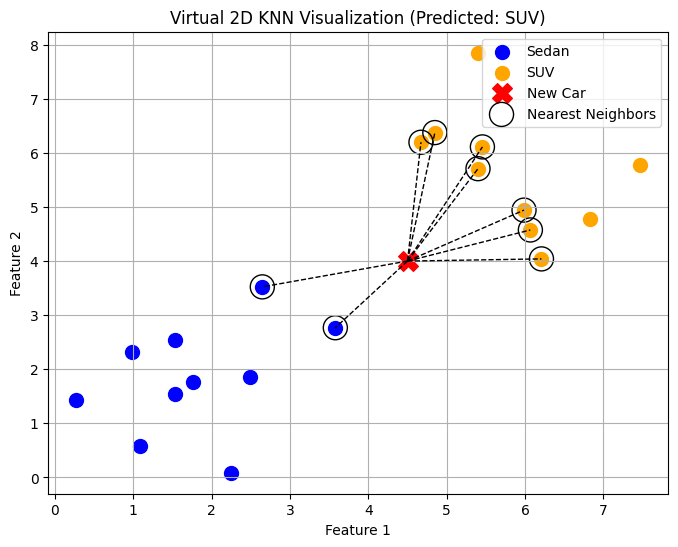

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter

# Random reproducibility
np.random.seed(42)

# Create two classes of points (virtual 2D space)
sedan_points = np.random.randn(10, 2) + np.array([2, 2])
suv_points = np.random.randn(10, 2) + np.array([6, 6])

# Combine into one dataset
X = np.vstack([sedan_points, suv_points])
y = np.array(['sedan'] * 10 + ['SUV'] * 10)

# New point to classify
new_point = np.array([[4.5, 4]])

# Compute Euclidean distances
distances = euclidean_distances(new_point, X)[0]

# Find 3 nearest neighbors
k = 9
nearest_indices = np.argsort(distances)[:k]
nearest_points = X[nearest_indices]
nearest_labels = y[nearest_indices]

# Predict majority class
prediction = Counter(nearest_labels).most_common(1)[0][0]

# --- Plotting ---
plt.figure(figsize=(8, 6))
plt.scatter(sedan_points[:, 0], sedan_points[:, 1], color='blue', label='Sedan', s=100)
plt.scatter(suv_points[:, 0], suv_points[:, 1], color='orange', label='SUV', s=100)
plt.scatter(new_point[0, 0], new_point[0, 1], color='red', s=200, marker='X', label='New Car')

# Highlight nearest neighbors
plt.scatter(nearest_points[:, 0], nearest_points[:, 1],
            facecolors='none', edgecolors='black', s=300, label='Nearest Neighbors')

# Draw connecting lines from new point to nearest neighbors
for p in nearest_points:
    plt.plot([new_point[0, 0], p[0]], [new_point[0, 1], p[1]], 'k--', linewidth=1)

plt.title(f'Virtual 2D KNN Visualization (Predicted: {prediction})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


# SVM - Supervised ML

## Create a dataset




In [156]:
import pandas as pd

# Create a simple dataset with car characteristics and car type
data = {'mileage': [20000, 30000, 15000, 40000, 25000, 50000, 18000, 32000, 12000, 45000, 28000, 55000],
        'age': [2, 3, 1, 4, 2, 5, 1.8, 3.2, 1.2, 4.5, 2.8, 5.5],
        'car_type': ['sedan', 'sedan', 'sedan', 'SUV', 'SUV', 'SUV', 'sedan', 'sedan', 'sedan', 'SUV', 'SUV', 'SUV']}
df = pd.DataFrame(data)

# Display the dataset
print("Our simple car dataset for SVM:")
print(df)

Our simple car dataset for SVM:
    mileage  age car_type
0     20000  2.0    sedan
1     30000  3.0    sedan
2     15000  1.0    sedan
3     40000  4.0      SUV
4     25000  2.0      SUV
5     50000  5.0      SUV
6     18000  1.8    sedan
7     32000  3.2    sedan
8     12000  1.2    sedan
9     45000  4.5      SUV
10    28000  2.8      SUV
11    55000  5.5      SUV


## Visualize the data


Create a scatter plot to visualize the dataset and see how the different car types are distributed.


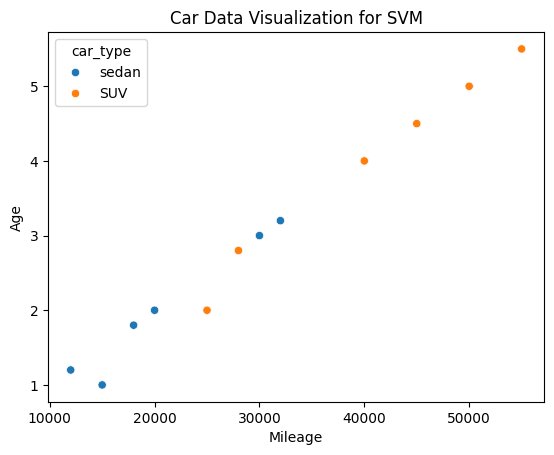

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the dataset
sns.scatterplot(x='mileage', y='age', hue='car_type', data=df)

# Add title and labels
plt.title('Car Data Visualization for SVM')
plt.xlabel('Mileage')
plt.ylabel('Age')

# Display the plot
plt.show()

## Train the svm model

Dataset to train a Support Vector Machine (SVM) model.


In [158]:
from sklearn.svm import SVC

# Separate features (X) and target variable (y)
X = df[['mileage', 'age']]
y = df['car_type']

# Instantiate the SVC model
svm_model = SVC()

# Fit the model to the data
svm_model.fit(X, y)

print("SVM model trained successfully.")

SVM model trained successfully.


## Visualize the decision boundary

Plot the data and the decision boundary learned by the SVM model to understand how it separates the classes.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


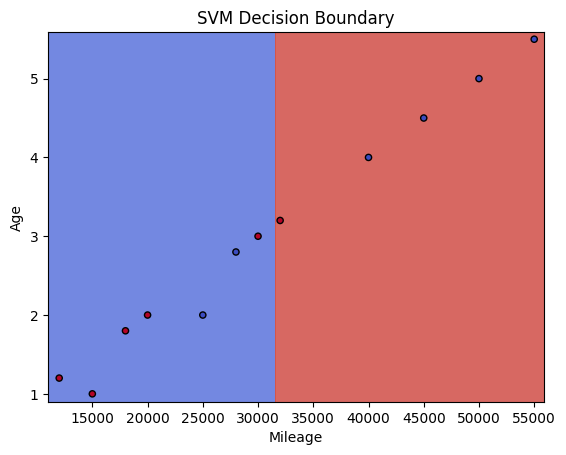

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid to cover the feature space
x_min, x_max = df['mileage'].min() - 1000, df['mileage'].max() + 1000
y_min, y_max = df['age'].min() - 0.1, df['age'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 100),
                     np.arange(y_min, y_max, 0.01))

# Predict the car type for each point in the meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert string predictions to numerical values for plotting
# Assuming 'sedan' is 0 and 'SUV' is 1 based on the original data's categorical codes
Z_numeric = np.where(Z == 'sedan', 0, 1)
Z_numeric = Z_numeric.reshape(xx.shape)

# Create a contour plot to visualize the decision boundary
plt.contourf(xx, yy, Z_numeric, cmap=plt.cm.coolwarm, alpha=0.8)

# Overlay a scatter plot of the original data points
plt.scatter(df['mileage'], df['age'], c=df['car_type'].astype('category').cat.codes, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Add title and labels
plt.title('SVM Decision Boundary')
plt.xlabel('Mileage')
plt.ylabel('Age')

# Display the plot
plt.show()

## Make a prediction


Use the trained SVM model to predict the car type for a new data point and visualize its location relative to the decision boundary.



Predicted car type for the new car: sedan


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


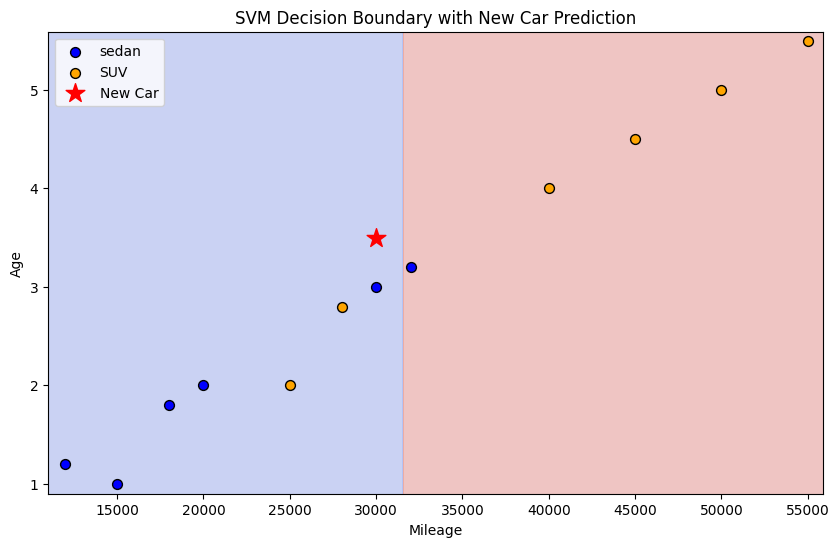

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# 1. Create a new DataFrame named new_car_df with a single row
new_car_df = pd.DataFrame({'mileage': [30000], 'age': [3.5]})

# 2. Use the trained svm_model's .predict() method to predict the car_type of the new_car_df
predicted_car_type = svm_model.predict(new_car_df)

# 3. Print the predicted car type for the new car
print(f"\nPredicted car type for the new car: {predicted_car_type[0]}")

# 4. Recreate the decision boundary visualization as in the previous step.
plt.figure(figsize=(10, 6))

# Create a meshgrid to cover the feature space
x_min, x_max = df['mileage'].min() - 1000, df['mileage'].max() + 1000
y_min, y_max = df['age'].min() - 0.1, df['age'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 100),
                     np.arange(y_min, y_max, 0.01))

# Predict the car type for each point in the meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert string predictions to numerical values for plotting
Z_numeric = np.where(Z == 'sedan', 0, 1)
Z_numeric = Z_numeric.reshape(xx.shape)

# Use clearly distinct colors
color_map = {'sedan': 'blue', 'SUV': 'orange'}

# Create a contour plot to visualize the decision boundary
plt.contourf(xx, yy, Z_numeric, cmap=plt.cm.coolwarm, alpha=0.3)

# Overlay a scatter plot of the original data points with distinct colors
for car_type in df['car_type'].unique():
    subset = df[df['car_type'] == car_type]
    plt.scatter(subset['mileage'], subset['age'],
                color=color_map[car_type], s=50, edgecolors='k', label=car_type)

# 5. On the same plot, use plt.scatter() to add the new car's data point
plt.scatter(new_car_df['mileage'], new_car_df['age'],
            color='red', s=200, marker='*', label='New Car')

# Add title and labels
plt.title('SVM Decision Boundary with New Car Prediction')
plt.xlabel('Mileage')
plt.ylabel('Age')

# Add a clear legend
plt.legend()

# 7. Display the plot
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


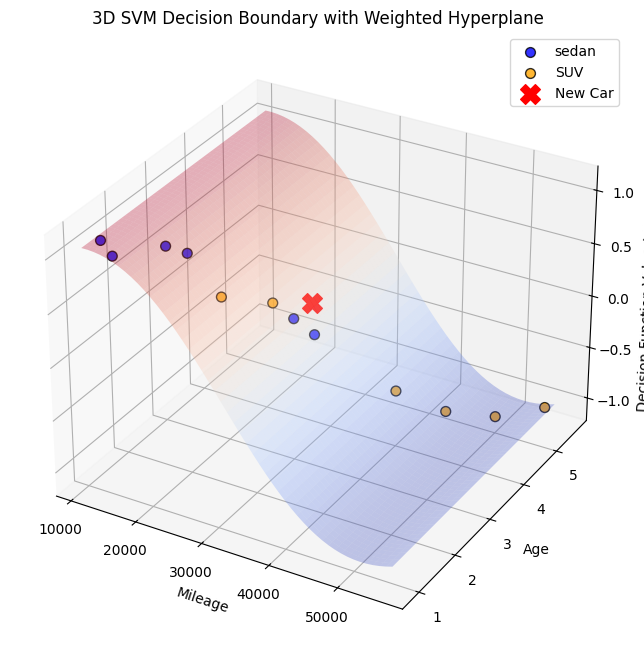

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 1. Extract features and target
X = df[['mileage', 'age']].values
y = df['car_type'].values

# 2. Get decision function values for the existing points (weighted distance to hyperplane)
decision_values = svm_model.decision_function(X)  # This gives signed distance from hyperplane

# Map 'sedan' -> 0, 'SUV' -> 1
y_numeric = np.where(y == 'sedan', 0, 1)

# 3. Prepare 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter original data with weight as height (decision function)
for car_type in df['car_type'].unique():
    idx = df['car_type'] == car_type
    ax.scatter(X[idx, 0], X[idx, 1], decision_values[idx],
               label=car_type, s=50, edgecolors='k', alpha=0.8,
               color='blue' if car_type=='sedan' else 'orange')

# Add the new car with its decision value
new_decision_value = svm_model.decision_function(new_car_df)
ax.scatter(new_car_df['mileage'], new_car_df['age'], new_decision_value,
           color='red', s=200, marker='X', label='New Car')

# 4. Create a linear hyperplane grid
x_min, x_max = df['mileage'].min() - 1000, df['mileage'].max() + 1000
y_min, y_max = df['age'].min() - 0.1, df['age'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Decision function for the meshgrid
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision hyperplane surface
ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.3)

# Labels and title
ax.set_xlabel('Mileage')
ax.set_ylabel('Age')
ax.set_zlabel('Decision Function Value (Weighted)')
ax.set_title('3D SVM Decision Boundary with Weighted Hyperplane')
ax.legend()

plt.show()


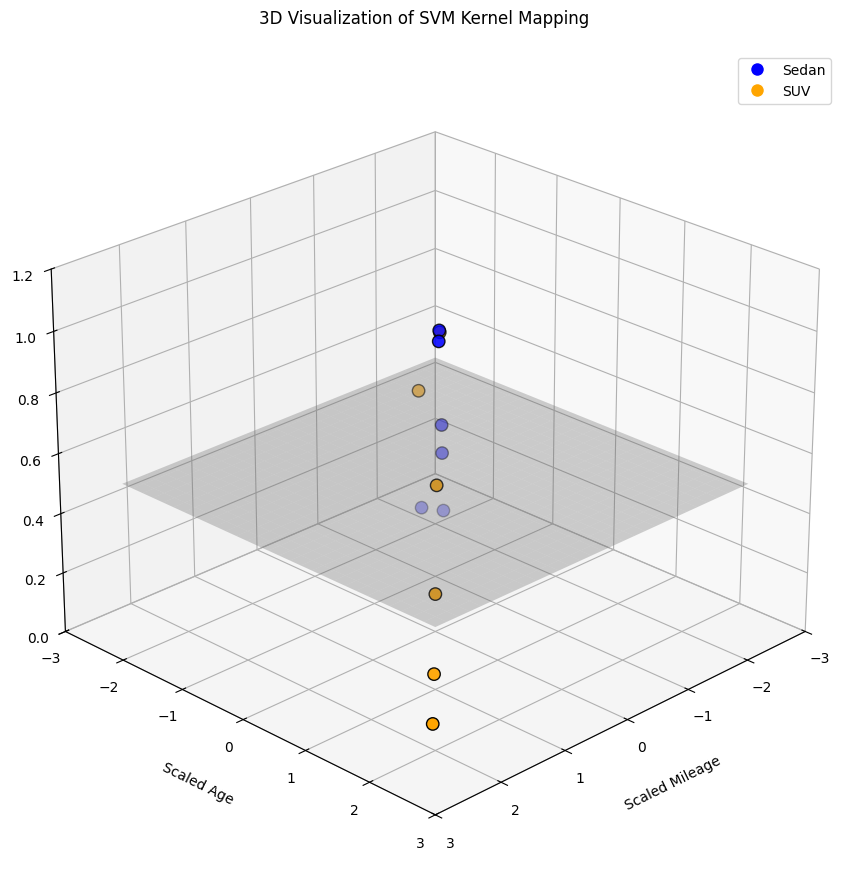

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Create the dataset
data = {'mileage': [20000, 30000, 15000, 40000, 25000, 50000, 18000, 32000, 12000, 45000, 28000, 55000],
        'age': [2, 3, 1, 4, 2, 5, 1.8, 3.2, 1.2, 4.5, 2.8, 5.5],
        'car_type': ['sedan', 'sedan', 'sedan', 'SUV', 'SUV', 'SUV',
                     'sedan', 'sedan', 'sedan', 'SUV', 'SUV', 'SUV']}
df = pd.DataFrame(data)

X = df[['mileage', 'age']]
y = df['car_type']

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train an SVM with an RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=0.5)
svm_rbf.fit(X_scaled, y)

# Step 4: Compute a synthetic third dimension (for conceptual visualization)
Z = np.exp(-0.5 * (X_scaled[:, 0]**2 + X_scaled[:, 1]**2))

# Step 5: Plot in 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Encode class colors
colors = ['blue' if label == 'sedan' else 'orange' for label in y]

# Plot data points
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], Z, c=colors, s=80, edgecolor='k')

# Plot a conceptual separating plane
x_surf, y_surf = np.meshgrid(np.linspace(-2.5, 2.5, 30),
                             np.linspace(-2.5, 2.5, 30))
z_surf = np.ones_like(x_surf) * 0.5  # Conceptual plane
ax.plot_surface(x_surf, y_surf, z_surf, color='gray', alpha=0.3, rstride=1, cstride=1)

# Label axes
ax.set_xlabel('Scaled Mileage', labelpad=15)
ax.set_ylabel('Scaled Age', labelpad=15)
ax.set_zlabel('Kernel Feature (Nonlinear Dimension)', labelpad=15)
ax.set_title('3D Visualization of SVM Kernel Mapping', pad=20)

# Adjust limits so graph isn’t cropped
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(0, 1.2)

# Improve camera angle
ax.view_init(elev=25, azim=45)

# Add legend
from matplotlib.lines import Line2D
sedan_proxy = Line2D([0], [0], marker='o', color='w', label='Sedan',
                     markerfacecolor='blue', markersize=10)
suv_proxy = Line2D([0], [0], marker='o', color='w', label='SUV',
                   markerfacecolor='orange', markersize=10)
ax.legend(handles=[sedan_proxy, suv_proxy], loc='upper right')

plt.tight_layout()
plt.show()


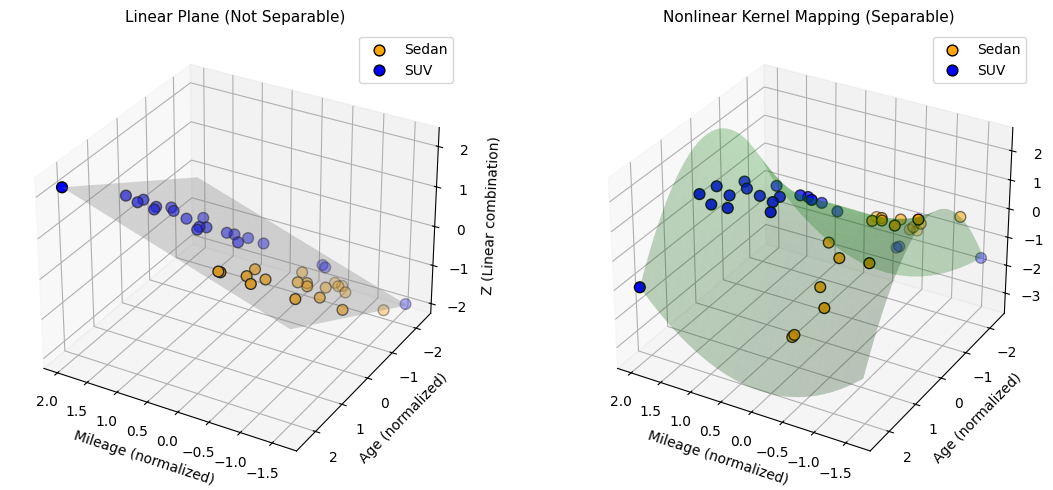

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1️⃣ Generate smaller, clearer dataset
# -----------------------------
X, y = make_classification(
    n_samples=40,          # fewer points for clarity
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

# Scale for visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x1, x2 = X_scaled[:, 0], X_scaled[:, 1]

# -----------------------------
# 2️⃣ Define the linear and nonlinear transformations
# -----------------------------
Z_linear = 0.5 * x1 + 0.5 * x2   # simple linear combination
Z_nonlinear = np.exp(-0.8 * (x1**2 + x2**2)) + 0.6 * (x1**2 - x2**2)  # nonlinear kernel-like lift

# -----------------------------
# 3️⃣ Create a 3D visualization
# -----------------------------
fig = plt.figure(figsize=(12, 5))

# --- Linear Case ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(x1[y==0], x2[y==0], Z_linear[y==0], color='orange', s=60, label='Sedan', edgecolor='k')
ax1.scatter(x1[y==1], x2[y==1], Z_linear[y==1], color='blue', s=60, label='SUV', edgecolor='k')

# Add visible linear plane (gray)
xgrid = np.linspace(min(x1), max(x1), 30)
ygrid = np.linspace(min(x2), max(x2), 30)
Xg, Yg = np.meshgrid(xgrid, ygrid)
Zg_linear = 0.5 * Xg + 0.5 * Yg
ax1.plot_surface(Xg, Yg, Zg_linear, alpha=0.3, color='gray')

ax1.set_title("Linear Plane (Not Separable)", fontsize=11)
ax1.set_xlabel("Mileage (normalized)")
ax1.set_ylabel("Age (normalized)")
ax1.set_zlabel("Z (Linear combination)")
ax1.view_init(30, 120)
ax1.legend()

# --- Nonlinear Case ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(x1[y==0], x2[y==0], Z_nonlinear[y==0], color='orange', s=60, label='Sedan', edgecolor='k')
ax2.scatter(x1[y==1], x2[y==1], Z_nonlinear[y==1], color='blue', s=60, label='SUV', edgecolor='k')

# Curved surface for nonlinear mapping
Zg_nonlinear = np.exp(-0.8 * (Xg**2 + Yg**2)) + 0.6 * (Xg**2 - Yg**2)
ax2.plot_surface(Xg, Yg, Zg_nonlinear, alpha=0.25, color='green')

ax2.set_title("Nonlinear Kernel Mapping (Separable)", fontsize=11)
ax2.set_xlabel("Mileage (normalized)")
ax2.set_ylabel("Age (normalized)")
ax2.set_zlabel("Z (Nonlinear mapping)")
ax2.view_init(30, 120)
ax2.legend()

plt.tight_layout()
plt.show()


https://www.youtube.com/watch?v=_YPScrckx28

# Decision Trees


## Create and visualize dataset




Our simple car dataset for Decision Tree:
    mileage  age car_type
0     20000  2.0    sedan
1     30000  3.0    sedan
2     15000  1.0    sedan
3     40000  4.0      SUV
4     25000  2.0      SUV
5     50000  5.0      SUV
6     18000  1.8    sedan
7     32000  3.2    sedan
8     12000  1.2    sedan
9     45000  4.5      SUV
10    35000  1.5    sedan
11    35000  2.0    sedan


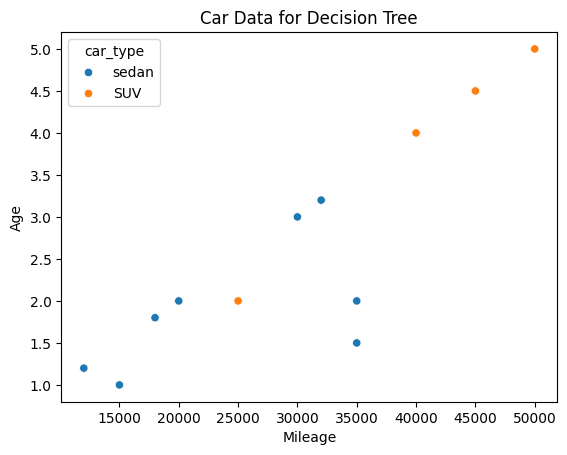

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a pandas DataFrame named df with three columns: 'mileage', 'age', and 'car_type'.
data = {'mileage': [20000, 30000, 15000, 40000, 25000, 50000, 18000, 32000, 12000, 45000,35000,35000],
        'age': [2, 3, 1, 4, 2, 5, 1.8, 3.2, 1.2, 4.5,1.5,2],
        'car_type': ['sedan', 'sedan', 'sedan', 'SUV', 'SUV', 'SUV', 'sedan', 'sedan', 'sedan', 'SUV', "sedan", "sedan"]}
df = pd.DataFrame(data)

# 2. Print the created DataFrame.
print("Our simple car dataset for Decision Tree:")
print(df)

# 3. Create a scatter plot using matplotlib.pyplot and seaborn
sns.scatterplot(x='mileage', y='age', hue='car_type', data=df)

# 4. Add a title to the scatter plot
plt.title('Car Data for Decision Tree')
plt.xlabel('Mileage')
plt.ylabel('Age')

# 5. Display the scatter plot.
plt.show()

## Train a decision tree



In [165]:
from sklearn.tree import DecisionTreeClassifier

# Separate features (X) and target variable (y)
X = df[['mileage', 'age']]
y = df['car_type']

# Instantiate the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the data
dt_model.fit(X, y)


# Print a message indicating successful training
print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


## Visualize the decision tree and decision boundary



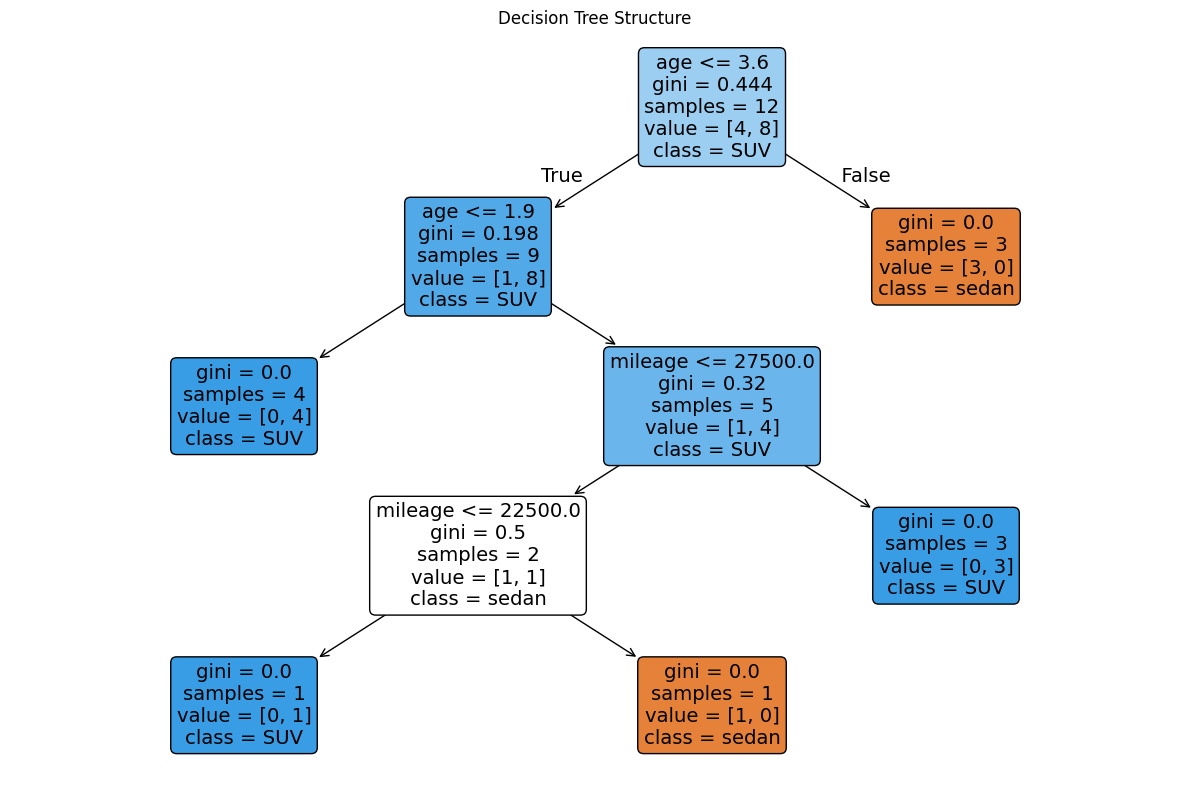

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


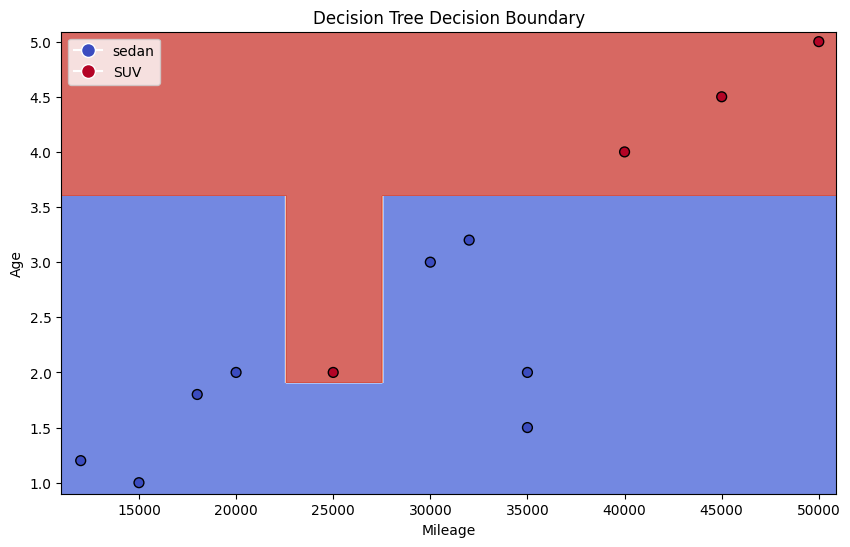

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

# 2. Create a figure and axes for plotting the tree
fig, ax = plt.subplots(figsize=(12, 8))

# 3. Use plot_tree to visualize the trained dt_model
plot_tree(dt_model, feature_names=['mileage', 'age'], class_names=['sedan', 'SUV'], filled=True, rounded=True, ax=ax)

# 4. Add a title to the tree plot
ax.set_title('Decision Tree Structure')

plt.tight_layout()
plt.show()


# 5. Create a meshgrid to cover the feature space
x_min, x_max = df['mileage'].min() - 1000, df['mileage'].max() + 1000
y_min, y_max = df['age'].min() - 0.1, df['age'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 100),
                     np.arange(y_min, y_max, 0.01))

# 6. Use the trained dt_model to predict the class for each point in the meshgrid
Z = dt_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert string predictions to numerical values for plotting
# Map 'sedan' to 0 and 'SUV' to 1
Z_numeric = np.where(Z == 'sedan', 0, 1)
Z_numeric = Z_numeric.reshape(xx.shape)


# 7. Create a contour plot of the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_numeric, cmap=plt.cm.coolwarm, alpha=0.8)

# 8. Overlay a scatter plot of the original data points
# Convert original car_type to numerical for scatter plot coloring
df['car_type_numeric'] = np.where(df['car_type'] == 'sedan', 0, 1)
plt.scatter(df['mileage'], df['age'], c=df['car_type_numeric'], cmap=plt.cm.coolwarm, s=50, edgecolors='k')

# 9. Add a title and labels to the decision boundary plot
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Mileage')
plt.ylabel('Age')

# Add a legend manually as scatter plot with 'c' doesn't automatically add hue legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='sedan',
                          markerfacecolor=plt.cm.coolwarm(0.), markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='SUV',
                          markerfacecolor=plt.cm.coolwarm(1.), markersize=10)]
plt.legend(handles=legend_elements)


# 10. Display both plots
plt.show()

## Summary:


*   The visualizations effectively demonstrate how a Decision Tree makes classifications by creating piecewise linear decision boundaries in the feature space.



## Make a prediction with the Decision Tree


Predict the car type for a new data point using the trained Decision Tree model.

In [167]:
# Create a new data point as a DataFrame
new_car_dt = pd.DataFrame({'mileage': [35000], 'age': [1.6]})

# Use the trained Decision Tree model to predict the car type
predicted_car_type_dt = dt_model.predict(new_car_dt)

# Print the predicted car type
print(f"\nPredicted car type for the new car using Decision Tree: {predicted_car_type_dt[0]}")


Predicted car type for the new car using Decision Tree: sedan
